## Ćwiczenie 4

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Wykresy utworzone przez funkcje z pakietu matplotlib to hierarchicznie zagnieżdzone obiekty. W kolejności od najgłębszego elementu tworzony jest: Figure, który przechowuje jeden lub wiecej Axes (właściwy wykres), każdy z Axesów przechowuje jeszcze mniejsze elementy takie jak znaczniki, podpisy osi/wykresu, indywidualne linie, legendy, texty. Praktycznie wszystko ma swój osobny byt, którym możemy manipulować.

![figure](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


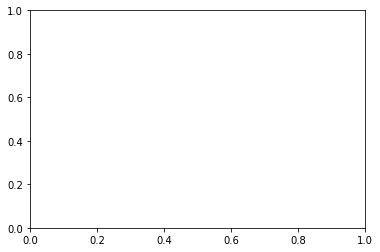

In [23]:
fig, ax = plt.subplots()
print type(fig)
print type(ax)

In [28]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
print type(one_tick)
print(one_tick.label)

<class 'matplotlib.axis.YTick'>
Text(0,0,u'0.0')


Każdy obiekt Figure posiada listę Axesów, kazdy z Axesów posiada oś y i x (yaxis, xaxis), z której każda posiada kolekcję głównych znaczników w formie listy, a w powyższym przykładzie wzieliśmy pierwszy z nich.

![figure](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

Text(4,-0.4,u'Made with http://matplotlib.org')

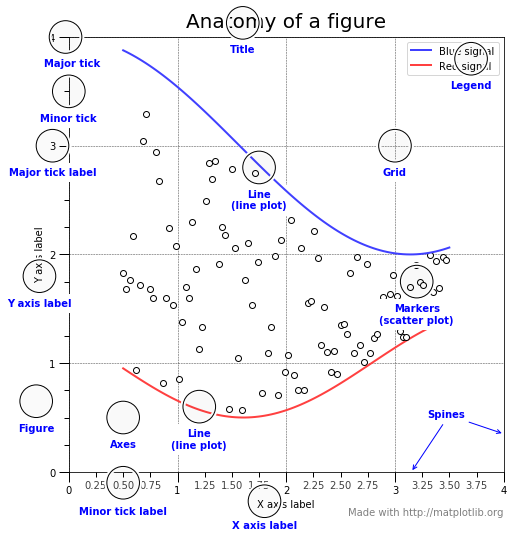

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

Źródło: https://matplotlib.org/examples/showcase/anatomy.html

Większość funkcji matplotliba jak np. plt.plot() ale również wiele innych jak plt.title(), plt.set_ylabel() itd. Działa na ostatni utworzonym obiekcie obrazka lub jeśli żaden nie został stworzony tworzy nowy potrzebny obiekt. Zamiast wywoływać funkcje bezpośrednio z pakietu plt możemy działać nimi na konkretnych obiektach Axes wtedy mamy pełną kontrolę nad tym, którym obiektem manipulujemy. 

## Więcej przykładów
---

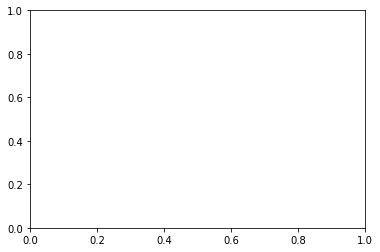

In [6]:
fig, ax = plt.subplots()

In [7]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Whe

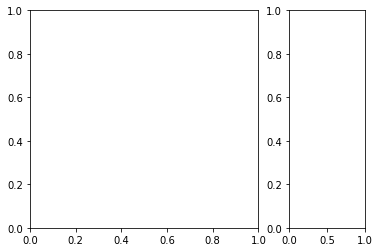

In [29]:
f,a = plt.subplots(nrows=1,ncols=2,gridspec_kw={'width_ratios': [3, 1]})

In [9]:
print(a)

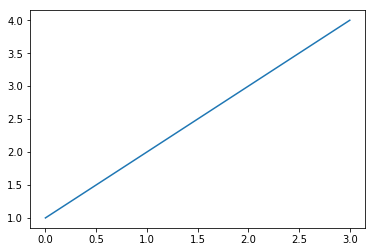

In [10]:
plt.plot([1, 2, 3, 4]) # Jeden parametr

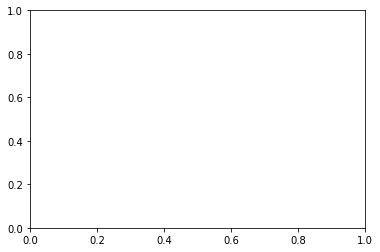

In [30]:
# Jeśli chcemy uzyskać obiekty które stworzył FIgure i Ax to dostaniemy się do nich przez funkcje:
fig = plt.gcf()
ax = plt.gca()

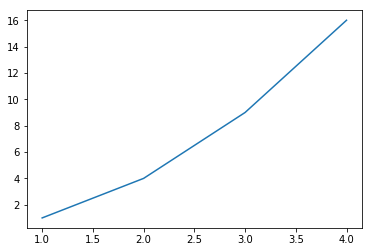

In [11]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16]) # dwa parametry x vs. y

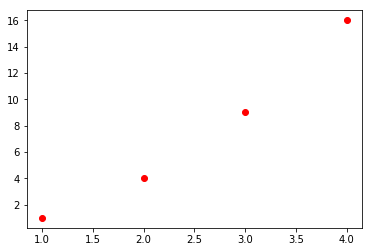

In [12]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')

### Style wykresu

<class 'matplotlib.lines.Line2D'>


Text(0.5,1,u'Tytul')

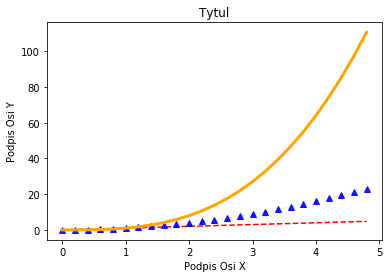

In [13]:
t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--')
plt.plot(t, t**2, color='blue',linestyle='-.',linewidth=0.1,alpha=0.9,marker='^')
line = plt.plot(t, t**3)

print(type(line[0]))

line[0].set_color('orange')
line[0].set_linestyle('-')
line[0].set_linewidth(3)

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

ax = plt.gca()

ax.set_xlabel('Podpis Osi X')
ax.set_ylabel('Podpis Osi Y')
ax.set_title('Tytul')



Text(0.5,0.98,u'Wykresy')

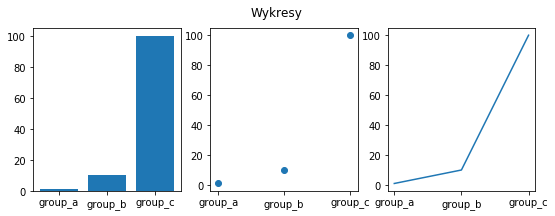

In [14]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

f,a = plt.subplots(1,3,figsize=(9, 3))

a[0].bar(names, values)
a[1].scatter(names, values)
a[2].plot(names, values)

plt.suptitle('Wykresy')

In [15]:
help(plt.Line2D)

Help on class Line2D in module matplotlib.lines:

class Line2D(matplotlib.artist.Artist)
 |  A line - the line can have both a solid linestyle connecting all
 |  the vertices, and a marker at each vertex.  Additionally, the
 |  drawing of the solid line is influenced by the drawstyle, e.g., one
 |  can create "stepped" lines in various styles.
 |  
 |  Method resolution order:
 |      Line2D
 |      matplotlib.artist.Artist
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt=u'none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
 |      Create a :class:`~matplotlib.lines.Line2D` instance with *x*
 |      and *y* data in sequences *xdata*, *ydata*.
 |      
 |  

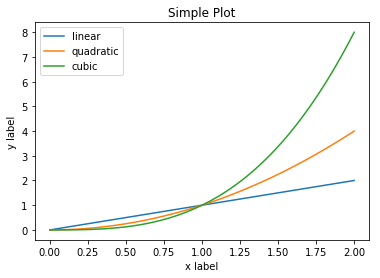

In [33]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic') # Nie chcemy legendy

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")

plt.legend()

In [17]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg

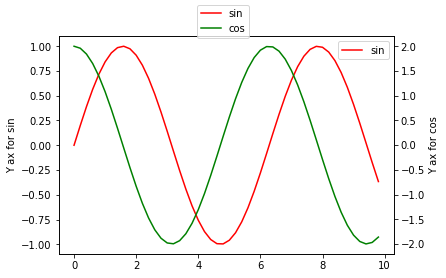

In [37]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
y2 = 2*np.cos(x)

fig, ax = plt.subplots()
ax2 = ax.twinx() # Duplikujemy axis

ax.plot(x, y, 'r', label='sin')
ax2.plot(x, y2, 'g', label='cos')


ax.set_ylabel('Y ax for sin')
ax2.set_ylabel('Y ax for cos')

ax.legend(loc=0) ## różnica w podejsciu do legendy
fig.legend(loc='upper center')

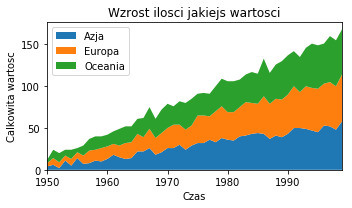

In [19]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
# Tworzenie wykresu
ax.stackplot(yrs, rng + rnd, labels=['Azja', 'Europa', 'Oceania'])
# manipulacja ustawieniami
ax.set_title('Wzrost ilosci jakiejs wartosci')
ax.legend(loc='upper left')
ax.set_ylabel('Calkowita wartosc')
ax.set_xlabel('Czas')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
# Działanie na całym wykresie (usunięcie białych luk)
fig.tight_layout()

[ 1.05057956  2.10158061]


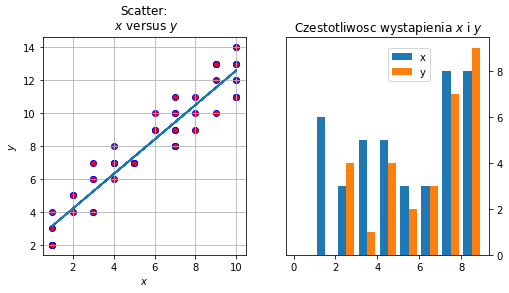

In [38]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4)) ## Zamiast do jedne listy możemy zapisać wynik do krotki przechowującej dwie zmienne

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter:\n $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(0, 10),label=('x', 'y'))
ax2.legend(loc=(0.5, 0.8))
ax2.set_title('Czestotliwosc wystapienia $x$ i $y$')
ax2.yaxis.tick_right()

ax1.grid(True)

p = np.polyfit(x, y, 1)
ax1.plot(x,p[0]*x+p[1])
print(p)

## Zadanie:

Wczytaj pliki salary.txt oraz names.txt (np.genfromtxt)

In [40]:
salary = np.genfromtxt("salary.txt", dtype=int, delimiter=",")
names = np.genfromtxt("names.txt", dtype=str, delimiter=":")

print(salary)
print(names)

[    0   100   200   500  1000  1200  1800  1850  5000 10000]
['Kasia' ' Basia' ' Mateusz' ' Jakub' ' Sara' ' Jessica' ' Rupert'
 ' Lucjan' ' Luiza' ' inz. Roman']


Text(0.5,1,u'Miesieczne zarobki 10 losowych osob')

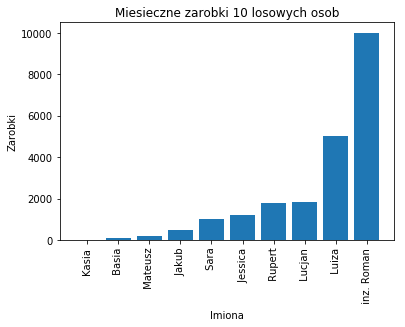

In [45]:
x = np.arange(len(names))
plt.bar(x, salary)
plt.xticks(x, names,rotation=90)
plt.ylabel("Zarobki")
plt.xlabel("Imiona")
plt.title("Miesieczne zarobki 10 losowych osob")

In [41]:
print(np.max(salary), np.min(salary), np.average(salary), np.median(salary))

(10000, 0, 2165.0, 1100.0)


Odrzućmy wartości odstające (mniejsze niż 4000 i większe niż 100)

[[2]
 [3]
 [4]
 [5]
 [6]
 [7]]
[2 3 4 5 6 7]


([<matplotlib.axis.XTick at 0xc555a90>,
 <a list of 6 Text xticklabel objects>)

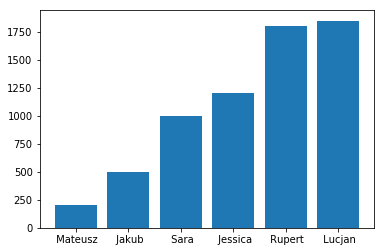

In [42]:
idx = np.argwhere((salary<4000)&(salary>100))
print idx
idx = idx.ravel()
print idx

new_names = names[idx]
new_salary = salary[idx]

x = range(len(new_names))
plt.bar(x, new_salary)
plt.xticks(x, new_names)


## Zadanie 

Wyselekcjonuj dane dla kobiet, stworz analogiczny wykres oblicz srednia ich zarobkow i ustaw jako tytul wykresu. Podpisz osie. Znaczniki osi y mają znajdować się po prawej stronie.

In [ ]:
print(names)

['Kasia', ' Basia', ' Sara', ' Jessica', ' Luiza']


([<matplotlib.axis.XTick at 0xd328898>,
 <a list of 5 Text xticklabel objects>)

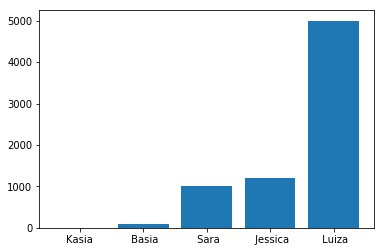

In [46]:
names_k = [name for name in names if name[-1] == 'a']
print(names_k)
idx = np.isin(names, names_k) ## np.isin

names_k = names[idx]
salary_k = salary[idx]

x = range(len(names_k))
plt.bar(x, salary_k)
plt.xticks(x, names_k)

Using Pandas

In [48]:
import pandas as pd

df = pd.concat([pd.read_csv("salary.txt",header=None).T,pd.read_csv("names.txt",header=None,sep=':').T],axis=1) ## Polaczmy dane

df.columns = ['salary','name'] ## Podpiszmy kolumny

df.set_index('name',inplace=True) ## Imiona są unikalne więc uznajmy je za klucz

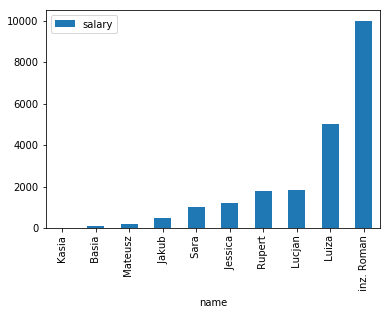

In [49]:
df.plot(kind='bar')

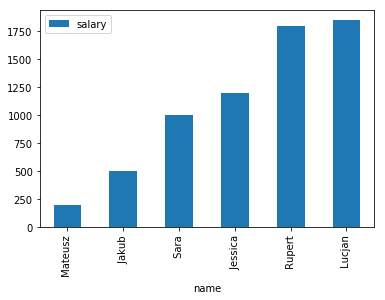

In [50]:
df[(df.salary>100)&(df['salary']<4000)].plot(kind='bar')

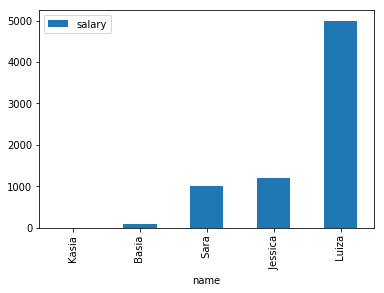

In [51]:
df[df.index.str.endswith('a')].plot(kind='bar')